# 2- Data preprocessing e ingeniería de características

Ingeniería de características. Ejercicio práctico con los datos de Pokémon:

- Handling missing data
- Grouping sparse classes
- Bin numerical data
- Handling outliers
- Transform variables

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import re

# Figures inline and set visualization style
%matplotlib inline
sns.set()

np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']

In [2]:
# cargar los datos
df = pd.read_csv('./data/pokemon.csv')
# ver los 10 primeros vectores de características
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### Handling missing data

In [3]:
# ver valores únicos que toma la variable 'Type 2'
types2 = np.unique(df['Type 2'].astype(str))
types2

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', 'nan'], dtype=object)

In [4]:
# cuántos valores nulos tiene la variable 'Type 2' en relación al resto de variables?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


[Text(0, 0, 'Poison'),
 Text(0, 0, 'Flying'),
 Text(0, 0, 'Dragon'),
 Text(0, 0, 'Ground'),
 Text(0, 0, 'Fairy'),
 Text(0, 0, 'Grass'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Psychic'),
 Text(0, 0, 'Steel'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Rock'),
 Text(0, 0, 'Dark'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Electric'),
 Text(0, 0, 'Fire'),
 Text(0, 0, 'Ghost'),
 Text(0, 0, 'Bug'),
 Text(0, 0, 'Normal')]

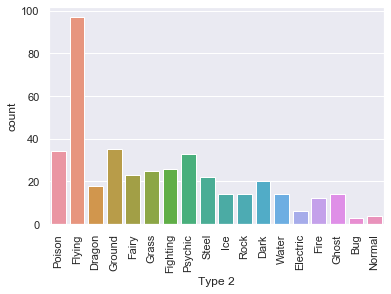

In [5]:
# plotear histograma para ver distribución de la variable 'Type 2'
ax = sns.countplot(df['Type 2'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)



In [6]:
# rellenar valores nulos de la variable 'Type 2' con 'Unknown'
df['Type 2'].fillna('Unknown', inplace=True)
# comprobar que efectivamente ya no hay nulos en la matriz de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


[Text(0, 0, 'Poison'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Flying'),
 Text(0, 0, 'Dragon'),
 Text(0, 0, 'Ground'),
 Text(0, 0, 'Fairy'),
 Text(0, 0, 'Grass'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Psychic'),
 Text(0, 0, 'Steel'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Rock'),
 Text(0, 0, 'Dark'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Electric'),
 Text(0, 0, 'Fire'),
 Text(0, 0, 'Ghost'),
 Text(0, 0, 'Bug'),
 Text(0, 0, 'Normal')]

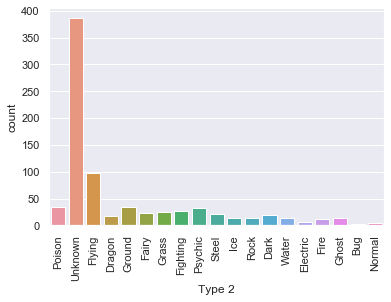

In [7]:
# plotear histograma para ver nuevamente la distribución de la variable 'Type 2'
ax = sns.countplot(df['Type 2'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Grouping sparse classes

In [8]:
# crear variable 'has_2nd_type' que determine 'Known' o 'Unknown' en función de si 'Type 2' es conocido o no
has_2nd_type = np.array(df['Type 2']) 
has_2nd_type[has_2nd_type != 'Unknown'] = 'Known'
df['has_2nd_type'] = has_2nd_type
df.head(10)

# nos quedamos con las variables ['Type 1', 'Type 2', 'has_2nd_type', 'Attack', 'Defense']
df_reduced = df[['Type 1', 'Type 2', 'has_2nd_type', 'Attack', 'Defense']]
df_reduced.head(10)

,Type 1,Type 2,has_2nd_type,Attack,Defense
0,Grass,Poison,Known,49,49
1,Grass,Poison,Known,62,63
2,Grass,Poison,Known,82,83
3,Grass,Poison,Known,100,123
4,Fire,Unknown,Unknown,52,43
5,Fire,Unknown,Unknown,64,58
6,Fire,Flying,Known,84,78
7,Fire,Dragon,Known,130,111
8,Fire,Flying,Known,104,78
9,Water,Unknown,Unknown,48,65


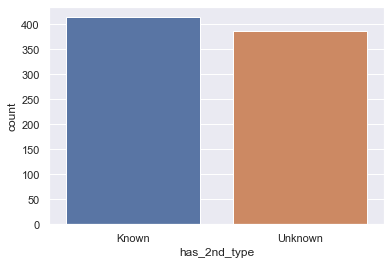

In [9]:
# plotear histograma para ver la distribución de la variable 'has_2nd_type' que acabamos de crear
ax = sns.countplot(df['has_2nd_type'])

Tendríamos que ver cómo los datos estarían ahora muy bien balanceados en función de si 'Type 2' es conocido o no

### Handling outliers

Outliers are [190, 185, 180, 180, 180, 170, 170]


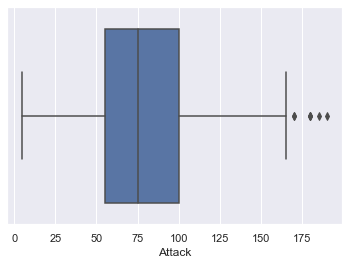

The upper limit is 190
The lower limit is 5


In [10]:
# chequear el boxplot de valores de la variable 'Atack'
ax = sns.boxplot(df['Attack'], showfliers=True) #showfliers en False elimina los outliers
outliers = [y for stat in boxplot_stats(df['Attack']) for y in stat['fliers']]
print('Outliers are',outliers)
plt.show()

# calcular los valores umbrales basados en los percentiles
upper_limit_attack = max(df['Attack'])
print('The upper limit is',upper_limit_attack)
lower_limit_attack = min(df['Attack'])
print('The lower limit is',lower_limit_attack)

In [11]:
# qué Pokémons tendrían unos valores de ataque que se podrían considerar como outliers según los percentiles usados?
def return_pokemon (outliers):
    total=[]
    for i in range (np.size(outliers)):
        temp = np.where(df['Attack'] == outliers[i])[0]
        for j in range (np.size(temp)):
            temp2= temp[j]
            total.append(temp2)
    unicos=np.unique(total, return_index=False, return_inverse=False, return_counts=False, axis=None)
    for i in range(np.size(unicos)):
        print(df['Name'][unicos[i]]) 

return_pokemon(outliers)

df_reduced1=df.iloc[np.where(df['Attack']!= np.array(outliers)[0])]

MewtwoMega Mewtwo X
HeracrossMega Heracross
GroudonPrimal Groudon
RayquazaMega Rayquaza
DeoxysAttack Forme
GarchompMega Garchomp
KyuremBlack Kyurem


In [12]:
# hacer el mismo ejercicio con la std respecto del valor medio
outliers2=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outliers2 = detect_outlier(df['Attack'])
print(outliers2)

return_pokemon(outliers2)

[190, 185, 180, 180, 180, 170, 170, 190, 185, 180, 180, 180]
MewtwoMega Mewtwo X
HeracrossMega Heracross
GroudonPrimal Groudon
RayquazaMega Rayquaza
DeoxysAttack Forme
GarchompMega Garchomp
KyuremBlack Kyurem


The upper limit is 176.31247101760664
The lower limit is -18.309971017606642


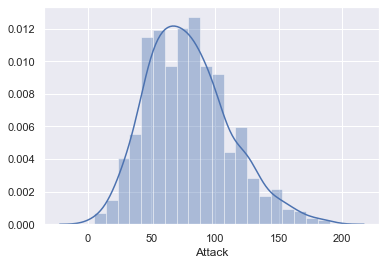

In [13]:
sns.distplot(df['Attack'])
# qué Pokémons tendrían unos valores de ataque que se podrían considerar como outliers según las desviaciones típicas?
mean_attack = np.mean(df['Attack'])
std_attack = np.std(df['Attack'])
# mostrar upper y lower limits según las std elegidas
upper = (mean_attack+3*std_attack)
lower = (mean_attack-3*std_attack)
print("The upper limit is",upper)
print("The lower limit is",lower)



In [14]:
outliers =np.where(df['Attack'] > (mean_attack+3*std_attack)) + np.where(df['Attack'] < (mean_attack-3*std_attack))
print(outliers[0])
df_reduced2=df.iloc[np.where(df['Attack']!= outliers)[0]]

[163 232 424 426 429]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 14 columns):
#               799 non-null int64
Name            799 non-null object
Type 1          799 non-null object
Type 2          799 non-null object
Total           799 non-null int64
HP              799 non-null int64
Attack          799 non-null int64
Defense         799 non-null int64
Sp. Atk         799 non-null int64
Sp. Def         799 non-null int64
Speed           799 non-null int64
Generation      799 non-null int64
Legendary       799 non-null bool
has_2nd_type    799 non-null object
dtypes: bool(1), int64(9), object(4)
memory usage: 88.2+ KB


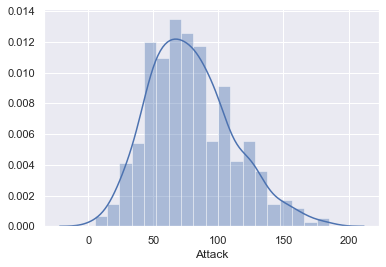

In [15]:
# elegir uno de los dos métodos para eliminar los outliers > umbral superior
df_reduced_normal = df_reduced1
df_reduced_normal.info()
# plotear distribución en base al método empleado
sns.distplot(df_reduced_normal['Attack'])

De este modo eliminaremos un porcentaje mínimo de datos (en torno a un 1%-5%) que muestran valores lejos de lo que podríamos considerar como "normal" o patrón que queremos modelar

### Bin numerical data

In [16]:
# crear bins de tamaño 4 para las variables 'Attack' y 'Defense' y asignar los valores a 2 nuevas variables: 'CatAttack' y 'CatDefense'
df_reduced_normal['CatAttack'] = np.array(np.floor(np.array(df_reduced_normal['Attack']) / 4.))
df_reduced_normal['CatDefense']= np.array(np.floor(np.array(df_reduced_normal['Defense']) / 4.))
df_reduced_normal.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,has_2nd_type,CatAttack,CatDefense
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Known,12.0,12.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Known,15.0,15.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Known,20.0,20.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Known,25.0,30.0
4,4,Charmander,Fire,Unknown,309,39,52,43,60,50,65,1,False,Unknown,13.0,10.0


In [17]:
# eliminar las variables 'Attack' y 'Defense'
df_reduced_normal_bins = df_reduced_normal[['Type 1', 'Type 2', 'has_2nd_type','CatAttack','CatDefense']]
df_reduced_normal_bins.head()

,Type 1,Type 2,has_2nd_type,CatAttack,CatDefense
0,Grass,Poison,Known,12.0,12.0
1,Grass,Poison,Known,15.0,15.0
2,Grass,Poison,Known,20.0,20.0
3,Grass,Poison,Known,25.0,30.0
4,Fire,Unknown,Unknown,13.0,10.0


Se debería obtener una categorización de ataque y defensa mucho más reducida y manejable

### Transform variables

In [18]:
# usar label encoder para transformar la variable 'Type 1' a tipo numérico
type1_le = LabelEncoder()
type1_le_labels = type1_le.fit_transform(df_reduced_normal['Type 1'])
df_reduced_normal_bins['Type1_id'] = type1_le_labels
# comprobar índices asociados a cada valor categórico de 'Type 1'
type1_mappings = {index: label for index, label in enumerate(type1_le.classes_)}
type1_mappings

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water'}

In [19]:
# borrar la variable numérica 'Type 1' y 'Type 2' y ver tabla resultante
df_reduced_normal_bins_encoded = df_reduced_normal[['has_2nd_type', 'Attack', 'Defense']]
df_reduced_normal_bins_encoded.head()

,has_2nd_type,Attack,Defense
0,Known,49,49
1,Known,62,63
2,Known,82,83
3,Known,100,123
4,Unknown,52,43


In [20]:
# usar 'get_dummies' para obtener un valor numérico para la variable categórica 'has_2nd_type'
df_reduced_normal_bins_encoded_trans = pd.get_dummies(df_reduced_normal_bins_encoded['has_2nd_type'], drop_first=True)
df_reduced_normal_bins_encoded_trans.head()


,Unknown
0,0
1,0
2,0
3,0
4,1
